In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Read the data csv
df = pd.read_csv("../datasets/amazon_fine_food.csv")
df = df.head(500)
print(df.head)
columns = df.columns

<bound method NDFrame.head of       Id   ProductId          UserId                      ProfileName  \
0      1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1      2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2      3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3      4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4      5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
..   ...         ...             ...                              ...   
495  496  B000G6RYNE   APGAA43E3WPN7                           Darren   
496  497  B000G6RYNE    ABR7HU5H1KNE                            Keith   
497  498  B000G6RYNE   AJQD2WWJYOYFQ                          bubbles   
498  499  B000G6RYNE  A16YH487W9ZYO0                 Bruce G. Lindsay   
499  500  B000G6RYNE   A83YQC1XOU4CS                         J. Baker   

     HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                    

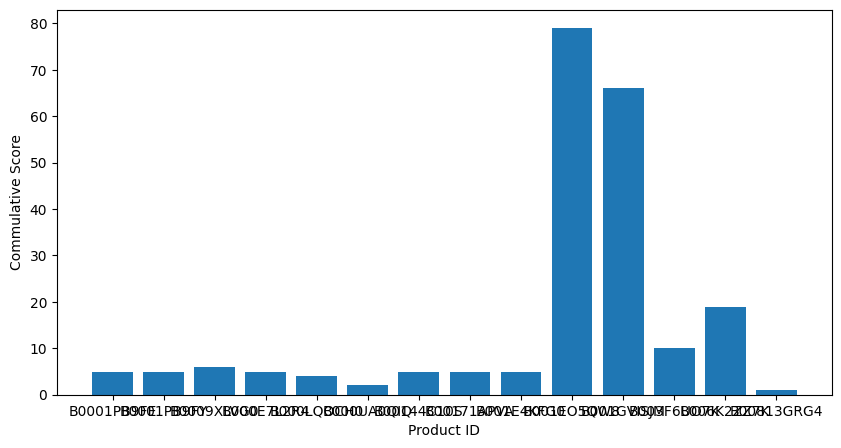

In [53]:
# compute total score for each product and check which ProductIds are getting most reviews
products_with_scores = df.groupby('ProductId')['Score'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.bar(products_with_scores['ProductId'], products_with_scores['Score'])
plt.xlabel('Product ID')
plt.ylabel('Commulative Score')
plt.show()


In [54]:
# get top 10 products with highest scores
print(products_with_scores.head(10)['ProductId'])

0    B0001PB9FE
1    B0001PB9FY
2    B0009XLVG0
3    B000E7L2R4
4    B000LQOCH0
5    B000UA0QIQ
6    B00144C10S
7    B00171APVA
8    B001E4KFG0
9    B001EO5QW8
Name: ProductId, dtype: object


             UserId  Total Reviews
248  A31N6KB160O508              3
110  A1Y3XPZK9ZADFW              2
303  A3HDKO7OW0QNK4              2
206  A2MUGFV2TDQ47K              2
409   AF72GTWZGAC61              2
336  A3PJZ8TU8FDQ1K              2
13   A15USNEAJUXOSH              2
33   A1B05INWIDZ74O              2


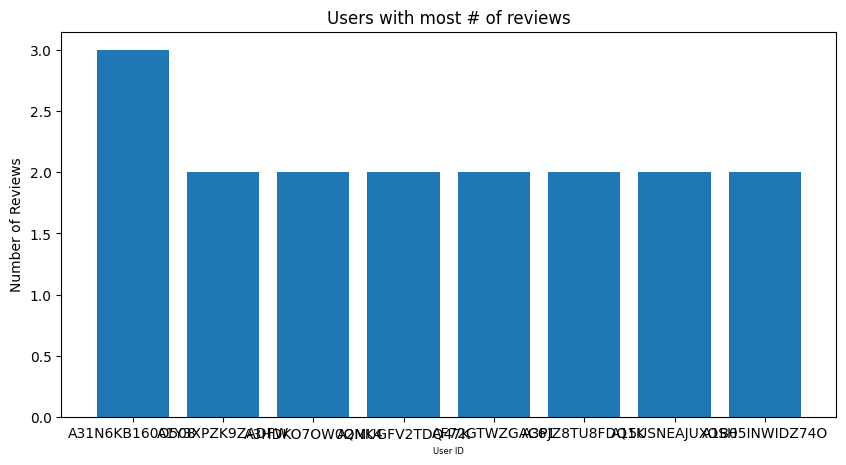

In [91]:
# get the top 5 users who has posted most reviews
users_with_number_of_reviews = df.groupby('UserId').size().reset_index(name='Total Reviews').sort_values('Total Reviews', ascending=False).head(8)
print(users_with_number_of_reviews)
plt.figure(figsize=(10, 5))
plt.bar(users_with_number_of_reviews['UserId'], users_with_number_of_reviews['Total Reviews'])
plt.xlabel('User ID', fontsize=6)
plt.ylabel('Number of Reviews')
plt.title('Users with most # of reviews')
plt.show()

In [116]:
# get the list of products bought by top 8 users
top_eight_user_products = df[df['UserId'].isin(users_with_number_of_reviews['UserId'])]
top_eight_user_products.groupby('UserId')['ProductId'].agg(lambda x: ','.join(x)).reset_index(name='Products').sort_values('Products', ascending=False)


,UserId,Products
3,A2MUGFV2TDQ47K,"B001GVISJM,B000G6RYNE"
7,AF72GTWZGAC61,"B001EO5ZME,B001EO5ZMY"
4,A31N6KB160O508,"B000G6RYNE,B000G6RYNE,B000G6RYNE"
0,A15USNEAJUXOSH,"B000G6RYNE,B000G6RYNE"
1,A1B05INWIDZ74O,"B000G6RYNE,B000G6RYNE"
2,A1Y3XPZK9ZADFW,"B000G6RYNE,B000G6RYNE"
6,A3PJZ8TU8FDQ1K,"B000G6RYNE,B000G6RYNE"
5,A3HDKO7OW0QNK4,"B0001PB9FE,B0001PB9FY"
